# Prediciendo el éxito de un videojuego
La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos de fuentes abiertas serán utilizados para identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.


## Paso 1: Datos y estudio de información general


### Inicialización

In [16]:
# Librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from scipy import stats as st

### Carga de datos

In [17]:
df_games=pd.read_csv('games.csv')

### Análisis preliminar

In [18]:
df_games.info()
print(df_games.describe())
print(df_games.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604 

## Paso 2: Preparación de datos

### Homologación de columnas

In [19]:
#Se convierten las columnas en minúsculas.
new_cols=[]
for column in df_games.columns:
    col=column.lower()
    new_cols.append(col)
df_games.columns=new_cols
print(df_games.columns)
    

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Conversión de datos

In [20]:
# Se convierte 'year_of_release' a int
df_games['year_of_release']=pd.to_numeric(df_games['year_of_release'],errors='coerce')
# Se convierte 'user_score' a float
df_games['user_score']=pd.to_numeric(df_games['user_score'],errors='ignore')
#Comprobación
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_3724\2127551893.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_games['user_score']=pd.to_numeric(df_games['user_score'],errors='ignore')


### Conclusiones preliminares
Las columnas fueron reemplazadas por valores en minúscula de manera efectiva. No se puede modificar el tipo de dato de year of release a int ni el user_score a float debido a los valores ausentes o que no son un número. Se convertirán los datos posterior al manejo de los valores ausentes.

### Manejo de valores ausentes

In [21]:
# Valores ausentes en name
sr_names=df_games['name']
names_na=sr_names.isna()
names_isna=df_games[names_na]
print(names_isna)


      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [22]:
# Los valores ausentes de name pertenecen a la plataforma GEN, en las mismas filas encontramos los valores ausentes de genre.
sr_plat=df_games['platform']
plat_gen=sr_plat=='GEN'
plat_isgen=df_games[plat_gen]
print(plat_isgen)


                                                    name platform  \
145                                 Sonic the Hedgehog 2      GEN   
257                                   Sonic the Hedgehog      GEN   
564                                        Mortal Kombat      GEN   
588                                      Streets of Rage      GEN   
659                                                  NaN      GEN   
832                                              NBA Jam      GEN   
960                                     Sonic & Knuckles      GEN   
996                                 Sonic the Hedgehog 3      GEN   
1099        Street Fighter II': Special Champion Edition      GEN   
1365                              Disney's The Lion King      GEN   
1453                                     Mortal Kombat 3      GEN   
1842                          NBA Jam Tournament Edition      GEN   
6451                                       Virtua Racing      GEN   
7885                              

In [23]:
#Se rellenan names y genres con unknown
df_games['name'].fillna('unknown',inplace=True)
df_games['genre'].fillna('unknown',inplace=True)

#comprobación
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_3724\2678070042.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['genre'].fillna('unknown',inplace=True)


In [24]:
# Manejo de ausentes en year of release

sr_yor=df_games['year_of_release']
yor_nan=sr_yor.isna()
yor_isna=df_games[yor_nan]
print(yor_isna)


                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

In [25]:
# Se usara el promedio de year_of_release por plataforma
df_games['year_of_release'] = df_games.groupby('platform')['year_of_release'].transform(
    lambda x: x.fillna(x.mean().round()))
# Convertir year_of_release a int
df_games['year_of_release']=df_games['year_of_release'].astype('int')
# Verificar el resultado
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [26]:
# Manejo de datos ausentes de critic_score
sr_cs=df_games['critic_score']
cs_nan=sr_cs.isna()
cs_isna=df_games[cs_nan]
print(cs_isna)
#Se mantendra el NaN en los valores nulos de critic_score.

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [27]:
# Manejo de datos ausentes de user_score
sr_us=df_games['user_score']
us_nan=sr_us.isna()
us_isna=df_games[us_nan]
print(us_isna)
#Se mantendra el NaN en los valores nulos de user_score.
#Se reemplazan TBD a np.NaN
df_games['user_score']=df_games['user_score'].replace('tbd',np.nan)
# Se convierte user_score a float
df_games['user_score']=df_games['user_score'].astype('float')
df_games.info()

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [28]:
# Manejo de datos ausentes de rating
sr_rate=df_games['rating']
rate_nan=sr_rate.isna()
rate_isna=df_games[rate_nan]
print(rate_isna)
df_games['rating']=df_games['rating'].fillna('unknown')
df_games.info()

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

### Manejo de duplicados

In [29]:
df_games=df_games.drop_duplicates()
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Conclusiones preliminares

Se llenaron los valores ausentes en 'year_of_release' para todos los títulos utilizando el promedio por plataforma. Name y Genre tenían dos valores ausentes cada uno en la misma fila. Al revisarse que no habían duplicados en la plataforma con las ventas se denominaron "unknown". Para los valores ausentes de critic_score y user_score se dejaron los valores nulos, ya que no es prudente utilizar un promedio ni redondear. Se eliminó de user_score los valores de 'tbd' y se reemplazó por np.NaN para transformar el tipo de dato en flotante. Finalmente los valores nulos de rating se llenaron con 'unknown'. No había valores duplicados. 

### Enriquecimiento de datos

In [30]:
#Se genera columna de total_sales con ventas totales de las cuatro regiones. 
df_games['total_sales']=df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Paso 3: Análisis de datos

### Juegos lanzados por periodo

    year_of_release  name
0              1980     9
1              1981    46
2              1982    53
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    62
14             1994   121
15             1995   219
16             1996   264
17             1997   289
18             1998   386
19             1999   341
20             2000   350
21             2001   482
22             2002   829
23             2003   800
24             2004   783
25             2005   973
26             2006  1006
27             2007  1197
28             2008  1457
29             2009  1493
30             2010  1285
31             2011  1161
32             2012   653
33             2013   552
34             2014   582
35             2015   606
36             2016   502


<Axes: title={'center': 'Número de títulos por año de lanzamiento'}, xlabel='Año', ylabel='Frecuencia'>

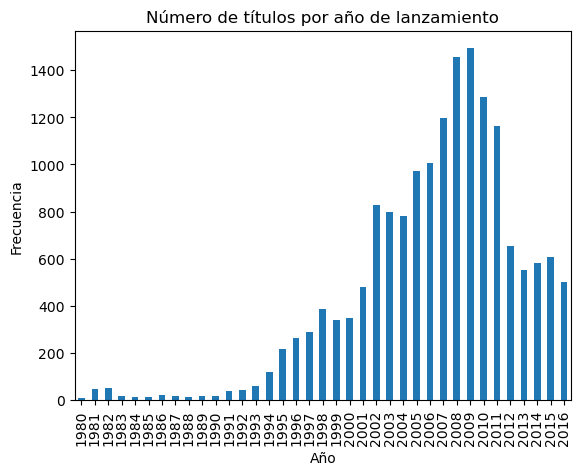

In [31]:

df_yor_group=df_games.groupby('year_of_release')['name'].count().reset_index()
print(df_yor_group)
df_yor_group.plot(kind='bar',x='year_of_release',y='name',title='Número de títulos por año de lanzamiento',xlabel='Año',ylabel='Frecuencia',legend=False)

Se observa que entre 1980 y 1994, se tienen menos de una centena de títulos en el periodo. Los años con más representación van desde 2002 hasta el 2011.

### Ventas por plataforma

   platform  total_sales
14     PCFX         0.03
9        GG         0.04
1       3DO         0.10
24     TG16         0.16
25       WS         1.42
12       NG         1.44
22      SCD         1.86
3        DC        15.95
8       GEN        30.77
21      SAT        33.59
20      PSV        54.07
27     WiiU        82.19
0      2600        96.98
30     XOne       159.32
7        GC       198.93
23     SNES       200.04
10      N64       218.68
11      NES       251.05
5        GB       255.46
29       XB       257.74
2       3DS       259.00
13       PC       259.52
19      PSP       294.05
18      PS4       314.14
6       GBA       317.85
15       PS       730.86
4        DS       806.12
26      Wii       907.51
17      PS3       939.65
28     X360       971.42
16      PS2      1255.77


<Axes: title={'center': 'Ventas por plataforma'}, xlabel='Plataforma', ylabel='Ventas/Millones de USD'>

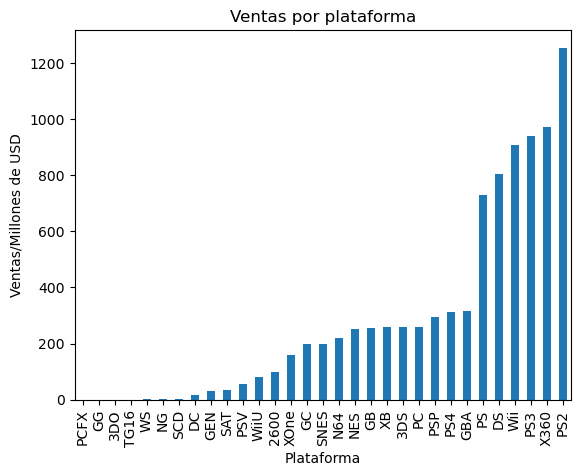

In [32]:

df_plat_group=df_games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales')
print(df_plat_group)
df_plat_group.plot(kind='bar',x='platform',y='total_sales',title='Ventas por plataforma',xlabel='Plataforma',ylabel='Ventas/Millones de USD',legend=False)


In [33]:
df_drop_ds=df_games[(df_games['platform']=='DS') & (df_games['year_of_release']==1985)]
print(df_drop_ds)
df_drop_stus=df_games[df_games['name']=='Strongest Tokyo University Shogi DS']
print(df_drop_stus)


                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0           NaN         NaN   

        rating  total_sales  
15957  unknown         0.02  
                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0           NaN         NaN   

        rating  total_sales  
15957  unknown         0.02  


Se tomaran en cuenta las plataformas con total de ventas superior a 700 MdUSD para los posteriores análisis. 

     year_of_release platform  total_sales
8               1985       DS         0.02
94              2000      PS2        39.17
104             2001      PS2       166.43
113             2002      PS2       205.38
119             2003      PS2       184.31
121             2004       DS        17.27
125             2004      PS2       211.81
128             2005       DS       130.14
132             2005      PS2       182.87
134             2005     X360         8.25
136             2006       DS       119.81
140             2006      PS2       103.42
141             2006      PS3        20.96
143             2006      Wii       137.15
144             2006     X360        51.62
147             2007       DS       146.94
151             2007      PS2        75.99
152             2007      PS3        73.19
154             2007      Wii       152.77
155             2007     X360        95.41
158             2008       DS       148.65
160             2008      PS2        53.90
161        

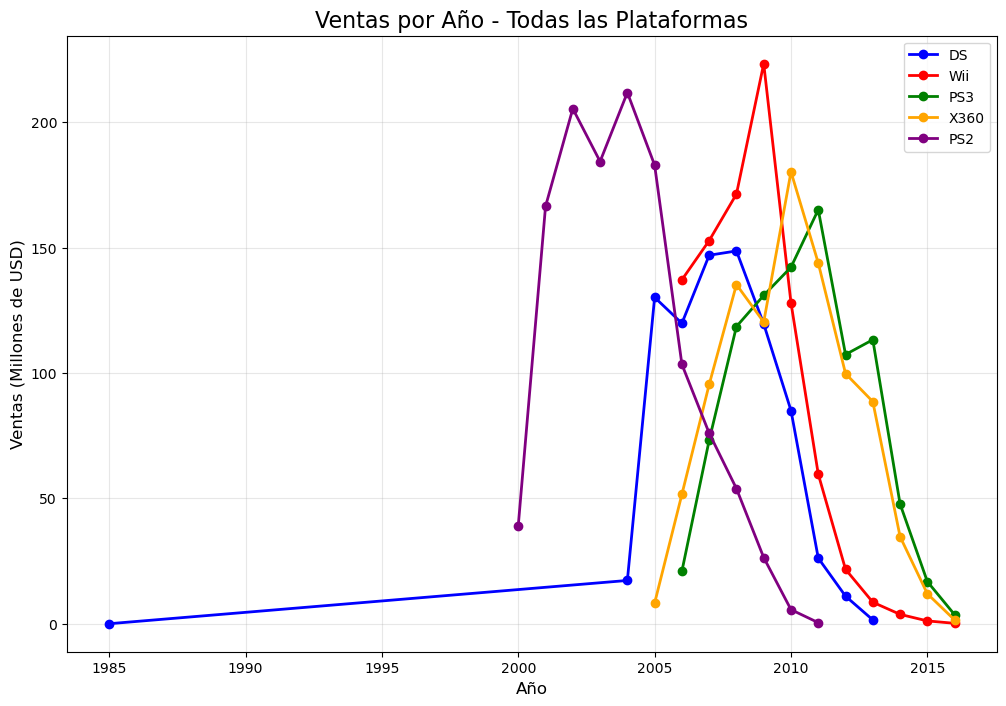

In [34]:
df_plat_group_year=df_games.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
df_plat_group_top5=df_plat_group_year[df_plat_group_year['platform'].isin(['DS','Wii','PS3','X360','PS2'])]
print(df_plat_group_top5)
plt.figure(figsize=(12, 8))

plat = ['DS', 'Wii', 'PS3', 'X360', 'PS2']
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, platform in enumerate(plat):
    df_filtered = df_plat_group_top5.query('platform == @platform')
    print(df_filtered.describe())
    plt.plot(df_filtered['year_of_release'], df_filtered['total_sales'], 
             label=platform, color=colors[i], marker='o', linewidth=2)

plt.title('Ventas por Año - Todas las Plataformas', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas (Millones de USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Se observa que las consolas con mayor éxito surgen a partir del año 2000. Se encontró un juego de 1985 para la consola de 'DS' muy probablemente un error de captura. Además podemos concluir que las plataformas tienen un periodo de vida aproximado de 10 años. 

In [35]:
#Generar dataFrame para hacer forecasting con filtro de año de lanzamiento mayor o igual a 2000
#Considerando que la información de 2016 no esta completa, se excluira del resultado.
#Considerando que las plataformas tienen su peak y decadencia en 10 años se revisara sólo el status de las activas desde 2005
df_forecast_plat=df_games[(df_games['year_of_release']>=2005)&(df_games['year_of_release']<2016)]
print(df_forecast_plat.describe())
df_forecast_plat.info()

       year_of_release      na_sales      eu_sales      jp_sales  \
count     10965.000000  10965.000000  10965.000000  10965.000000   
mean       2009.324578      0.239039      0.144627      0.054853   
std           2.812320      0.760292      0.555512      0.254828   
min        2005.000000      0.000000      0.000000      0.000000   
25%        2007.000000      0.000000      0.000000      0.000000   
50%        2009.000000      0.070000      0.020000      0.000000   
75%        2011.000000      0.220000      0.100000      0.030000   
max        2015.000000     41.360000     28.960000      6.500000   

        other_sales  critic_score   user_score   total_sales  
count  10965.000000   5525.000000  5372.000000  10965.000000  
mean       0.053502     68.272941     6.930864      0.492020  
std        0.183093     13.934420     1.490782      1.569335  
min        0.000000     13.000000     0.000000      0.000000  
25%        0.000000     60.000000     6.200000      0.050000  
50%      

    platform  year_of_release  total_sales
94        XB             2005        49.08
53       PSP             2005        43.84
33       PS2             2005       182.87
22        PC             2005         4.37
7         DS             2005       130.14
..       ...              ...          ...
82      WiiU             2015        16.35
63       PSP             2015         0.12
78       Wii             2015         1.14
32        PC             2015         8.52
100     XOne             2015        60.14

[101 rows x 3 columns]


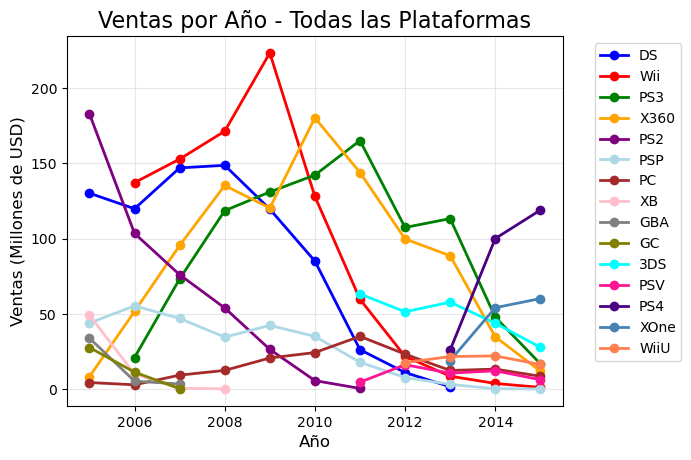

In [36]:
# Comprobar comportamiento de las plataformas a partir del 2010
plat = ['DS', 'Wii', 'PS3', 'X360', 'PS2','PSP','PC','XB','GBA','GC','3DS','PSV','PS4','XOne','WiiU']
colors = ['blue', 'red', 'green', 'orange', 'purple','lightblue', 'brown', 'pink', 'gray', 'olive','cyan', 'deeppink', 'indigo', 'steelblue', 'coral']
df_forecast_grouped_plat=df_forecast_plat.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
df_forecast_grouped_plat.sort_values('year_of_release',inplace=True)
print(df_forecast_grouped_plat)
for i, platform in enumerate(plat):
    df_filtered = df_forecast_grouped_plat.query('platform == @platform')
    plt.plot(df_filtered['year_of_release'], df_filtered['total_sales'], 
             label=platform, color=colors[i], marker='o', linewidth=2)

plt.title('Ventas por Año - Todas las Plataformas', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas (Millones de USD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Observamos que las dos plataformas que están creciendo de manera más acelerada en ventas es PS4 y XOne. Quitando el reinado de PS3 y X360, en 2013, que son sus versiones anteriores. WiiU y PSV aunque no han tenido la misma pendiente en crecimiento, podemos tomarlas en cuenta porque si han presentado crecimiento. 

C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_3724\4054503908.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


<function matplotlib.pyplot.show(close=None, block=None)>

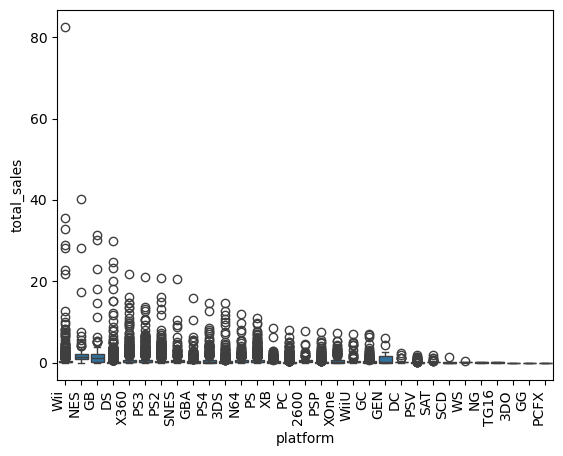

In [ ]:
# Diagramas de cajas por plataforma
ax=sns.boxplot(data=df_games, x='platform', y='total_sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') 
plt.ylim=(0,40)
plt.show


C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_3724\3698973852.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


<function matplotlib.pyplot.show(close=None, block=None)>

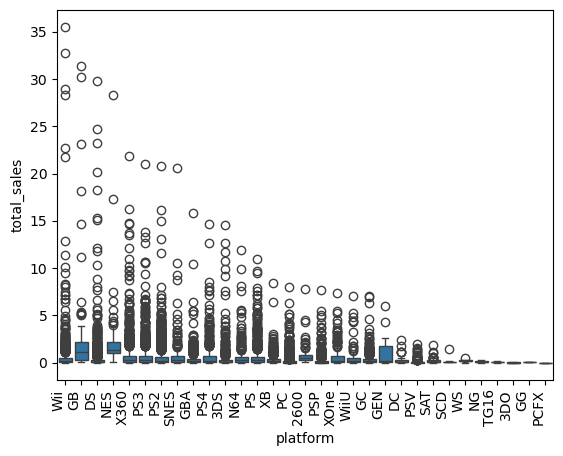

In [38]:
#diagrama de caja sin juegos con ventas mayores a 40MDD
df_games_max_40=df_games[df_games['total_sales']<=40]
ax=sns.boxplot(data=df_games_max_40, x='platform', y='total_sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') 
plt.ylim=(0,40)
plt.show


Concluimos que la mayoría de los juegos en todas las plataformas no supera en promedio los 3 Millones de dolares en ventas globales. Sin embargo, la mayoría de las plataformas cuentas con algunos títulos que fueron grandes éxitos. Para posteriores análisis solo utilizaremos los juegos que superaron los 5MdD en ventas

<Axes: title={'center': 'Ventas totales de PS3 por score crítico'}, xlabel='score crítico', ylabel='Ventas/MdDólares'>

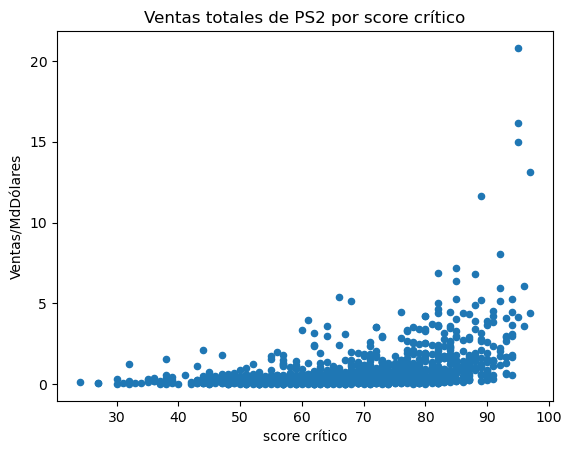

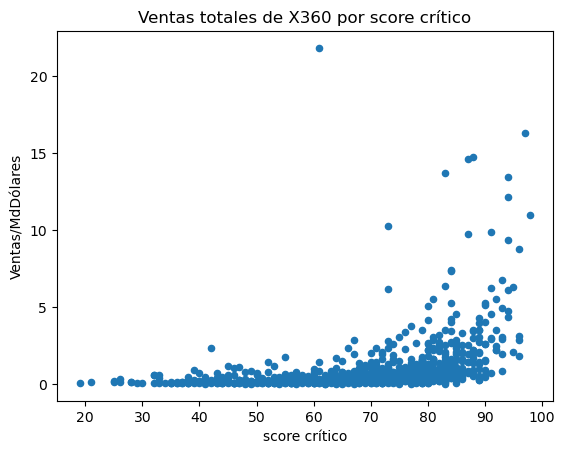

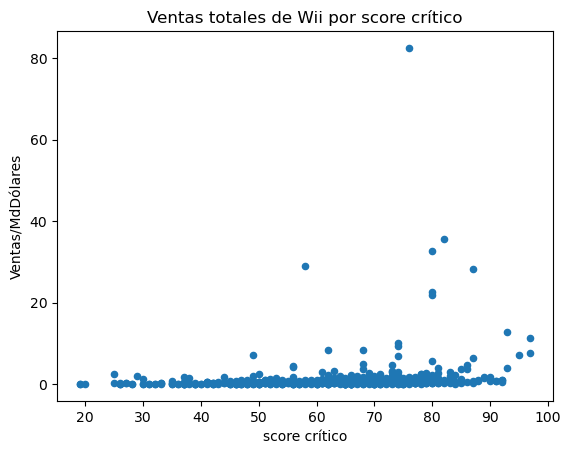

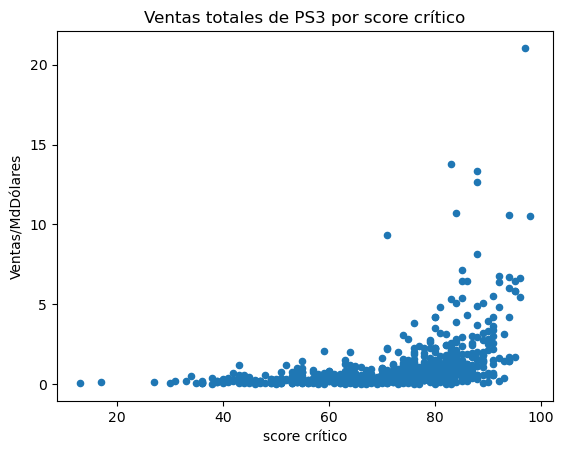

In [39]:
#Se eligen las plataformas de PS2, X360, Wii y PS3 para la relación entre la críticas y las ventas totales 
df_sales_ps2=df_games[df_games['platform']=='PS2']
df_sales_x360=df_games[df_games['platform']=='X360']
df_sales_wii=df_games[df_games['platform']=='Wii']
df_sales_ps3=df_games[df_games['platform']=='PS3']
#Relación de ventas con críticas profesionales:
df_sales_ps2.plot(x='critic_score',y='total_sales',kind='scatter',title='Ventas totales de PS2 por score crítico',xlabel='score crítico',ylabel='Ventas/MdDólares',legend=False)
df_sales_x360.plot(x='critic_score',y='total_sales',kind='scatter',title='Ventas totales de X360 por score crítico',xlabel='score crítico',ylabel='Ventas/MdDólares',legend=False)
df_sales_wii.plot(x='critic_score',y='total_sales',kind='scatter',title='Ventas totales de Wii por score crítico',xlabel='score crítico',ylabel='Ventas/MdDólares',legend=False)
df_sales_ps3.plot(x='critic_score',y='total_sales',kind='scatter',title='Ventas totales de PS3 por score crítico',xlabel='score crítico',ylabel='Ventas/MdDólares',legend=False)


<Axes: title={'center': 'Ventas totales de PS3 por score de usuario'}, xlabel='score de usuario', ylabel='Ventas/MdDólares'>

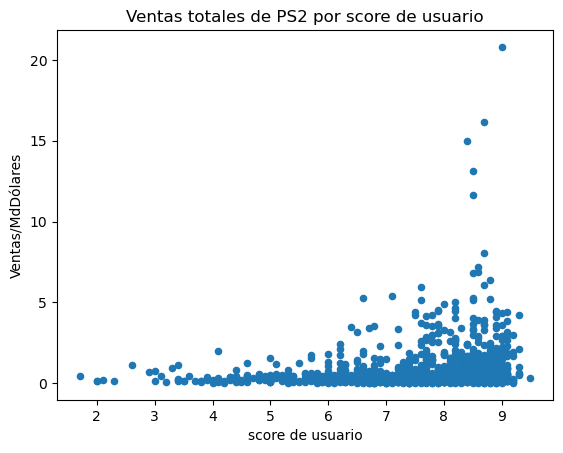

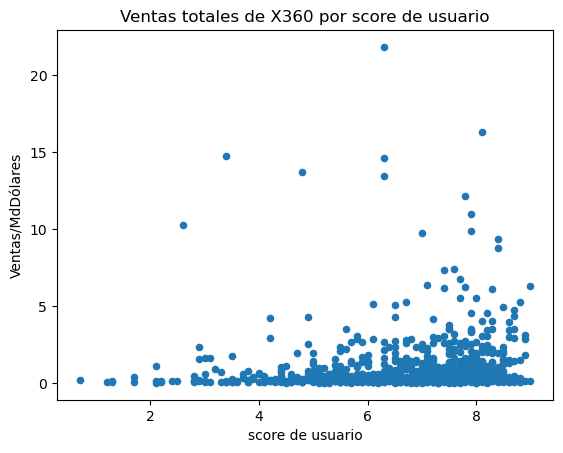

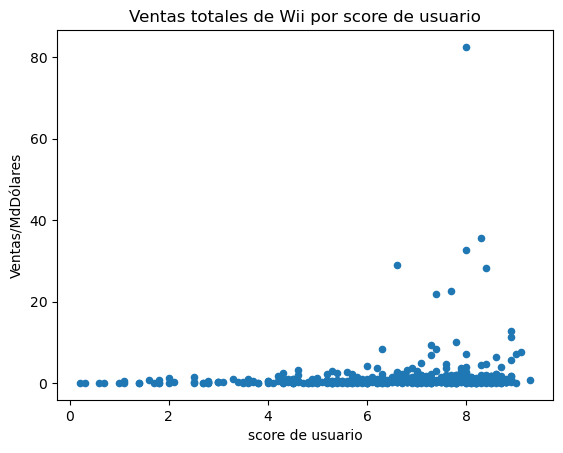

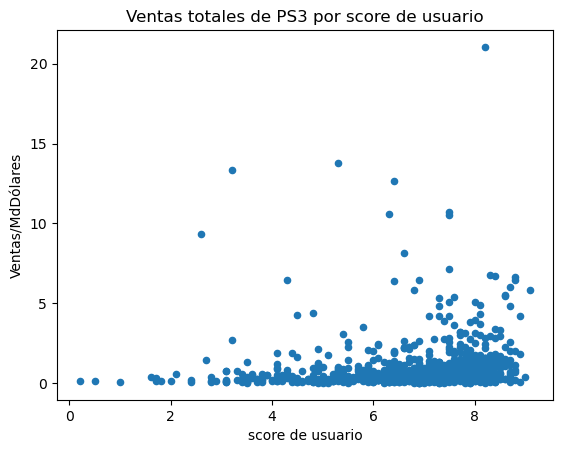

In [40]:
#Relación de ventas con críticas de usuario:
df_sales_ps2.plot(x='user_score',y='total_sales',kind='scatter',title='Ventas totales de PS2 por score de usuario',xlabel='score de usuario',ylabel='Ventas/MdDólares',legend=False)
df_sales_x360.plot(x='user_score',y='total_sales',kind='scatter',title='Ventas totales de X360 por score de usuario',xlabel='score de usuario',ylabel='Ventas/MdDólares',legend=False)
df_sales_wii.plot(x='user_score',y='total_sales',kind='scatter',title='Ventas totales de Wii por score de usuario',xlabel='score de usuario',ylabel='Ventas/MdDólares',legend=False)
df_sales_ps3.plot(x='user_score',y='total_sales',kind='scatter',title='Ventas totales de PS3 por score de usuario',xlabel='score de usuario',ylabel='Ventas/MdDólares',legend=False)


In [41]:
#Cálculo de correlación:
print('El coeficiente de correlación de PS2 de las ventas con el score crítico es de:',df_sales_ps2['critic_score'].corr(df_sales_ps2['total_sales']))
print('El coeficiente de correlación de X360 de las ventas con el score crítico es de:',df_sales_x360['critic_score'].corr(df_sales_x360['total_sales']))
print('El coeficiente de correlación de Wii de las ventas con el score crítico es de:',df_sales_wii['critic_score'].corr(df_sales_wii['total_sales']))
print('El coeficiente de correlación de PS3 de las ventas con el score crítico es de:',df_sales_ps3['critic_score'].corr(df_sales_ps3['total_sales']))
print('El coeficiente de correlación de PS2 de las ventas con el score de usuario es de:',df_sales_ps2['user_score'].corr(df_sales_ps2['total_sales']))
print('El coeficiente de correlación de X360 de las ventas con el score de usuario es de:',df_sales_x360['user_score'].corr(df_sales_x360['total_sales']))
print('El coeficiente de correlación de Wii de las ventas con el score de usuario es de:',df_sales_wii['user_score'].corr(df_sales_wii['total_sales']))
print('El coeficiente de correlación de PS3 de las ventas con el score de usuario es de:',df_sales_ps3['user_score'].corr(df_sales_ps3['total_sales']))

El coeficiente de correlación de PS2 de las ventas con el score crítico es de: 0.39543454945454876
El coeficiente de correlación de X360 de las ventas con el score crítico es de: 0.39373586530725835
El coeficiente de correlación de Wii de las ventas con el score crítico es de: 0.17755988806089956
El coeficiente de correlación de PS3 de las ventas con el score crítico es de: 0.4324315685642063
El coeficiente de correlación de PS2 de las ventas con el score de usuario es de: 0.1728655111205822
El coeficiente de correlación de X360 de las ventas con el score de usuario es de: 0.11445882978454182
El coeficiente de correlación de Wii de las ventas con el score de usuario es de: 0.11241436067003163
El coeficiente de correlación de PS3 de las ventas con el score de usuario es de: 0.12669133936341692


Concluimos que el score crítico tiene más peso en las ventas que el score de usuario. En la plataforma de wii tenemos un juego con una atipicidad extrema. Se podría recalcular quitándolo. Ya que el resto de las plataformas tienen una correlación de alrededor el 40% con el critic_score y no pasa del 17.2% para el user_score.

<function matplotlib.pyplot.show(close=None, block=None)>

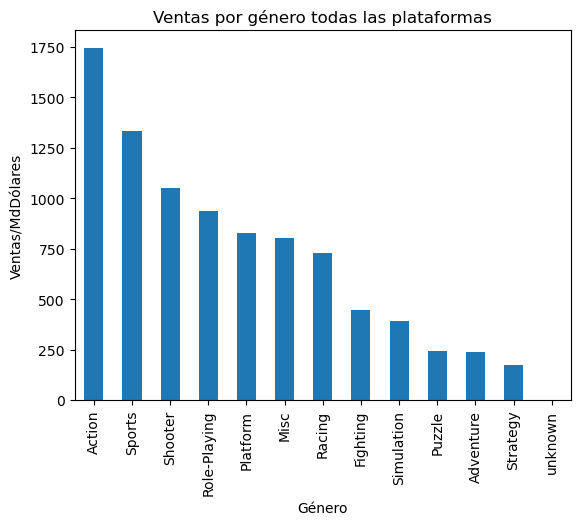

In [42]:
df_games_genre=df_games.groupby('genre')['total_sales'].sum().reset_index().sort_values('total_sales',ascending=False)
df_games_genre.plot(x='genre',y='total_sales',title='Ventas por género todas las plataformas', xlabel='Género',ylabel='Ventas/MdDólares',legend=False,kind='bar')
plt.show

La grafica de ventas por género nos indica que hay una alta preferencia por juegos de acción, deporte y shooters. Las menores ventas se registran en juegos de lógica, estrategia y simulación.

## Paso 4: Perfiles de usuario para cada región

<Axes: title={'center': 'Ventas por plataforma en Europa'}, xlabel='Plataforma', ylabel='Ventas/MdDólares'>

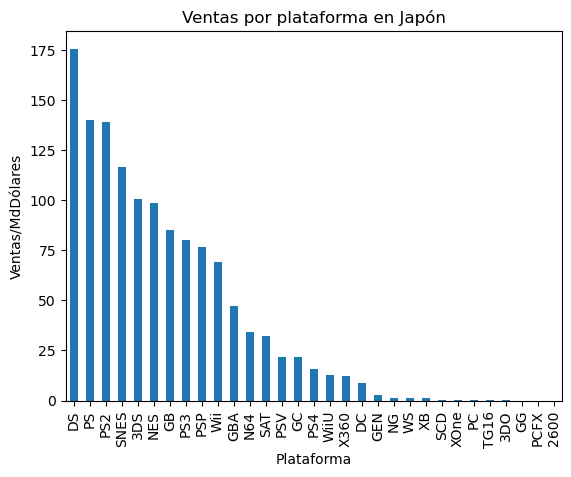

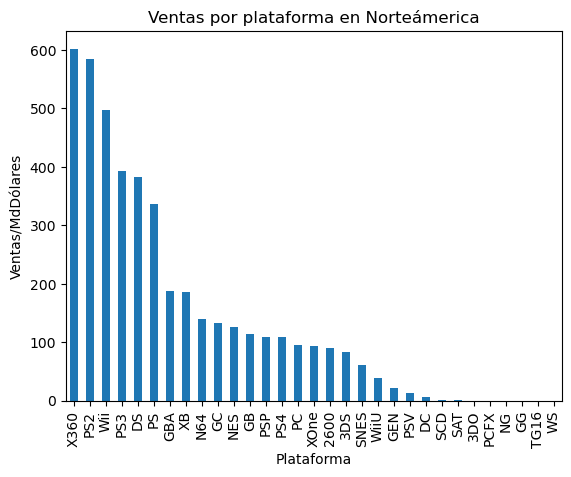

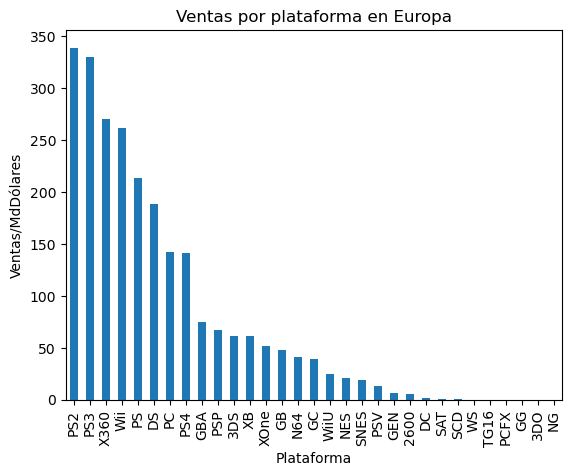

In [43]:

# Top plataformas en cada región:
df_games_jp_sales=df_games.groupby('platform')['jp_sales'].sum().reset_index().sort_values('jp_sales',ascending=False)
df_games_na_sales=df_games.groupby('platform')['na_sales'].sum().reset_index().sort_values('na_sales',ascending=False)
df_games_eu_sales=df_games.groupby('platform')['eu_sales'].sum().reset_index().sort_values('eu_sales',ascending=False)
df_games_jp_sales.plot(x='platform',y='jp_sales',title='Ventas por plataforma en Japón', xlabel='Plataforma',ylabel='Ventas/MdDólares',legend=False,kind='bar')
df_games_na_sales.plot(x='platform',y='na_sales',title='Ventas por plataforma en Norteámerica', xlabel='Plataforma',ylabel='Ventas/MdDólares',legend=False,kind='bar')
df_games_eu_sales.plot(x='platform',y='eu_sales',title='Ventas por plataforma en Europa', xlabel='Plataforma',ylabel='Ventas/MdDólares',legend=False,kind='bar')



Observamos que el PS2 ha sido muy relevante en las 3 regiones. En Japón vemos que a diferencia del PS y PS2 el PS3 no tuvo mucho éxito. Hay dos consolas minis que se ha consolidado como las principales plataformas de la región. Mientrás que X360 no tuvo un éxito cercano al que tuvo en NA y EU. El Wii, el PS2, PS3 y el x360 tuvieron un gran éxito en ventas en NA y EU. Siendo consolas más recientes y sólo wii pertenece a nintendo, la compañia japonesa.

<Axes: title={'center': 'Ventas por género en Europa'}, xlabel='Género', ylabel='Ventas/MdDólares'>

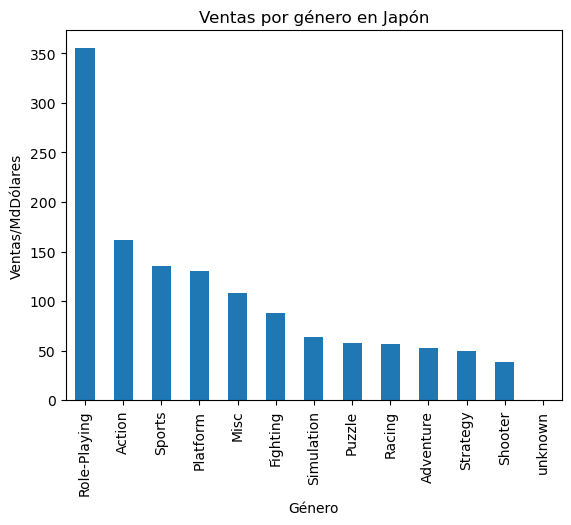

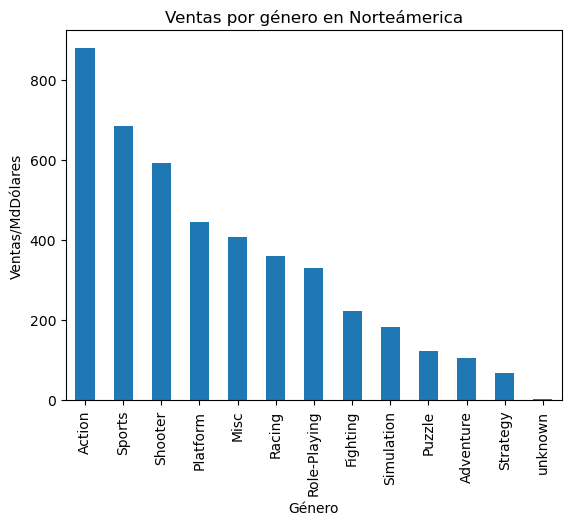

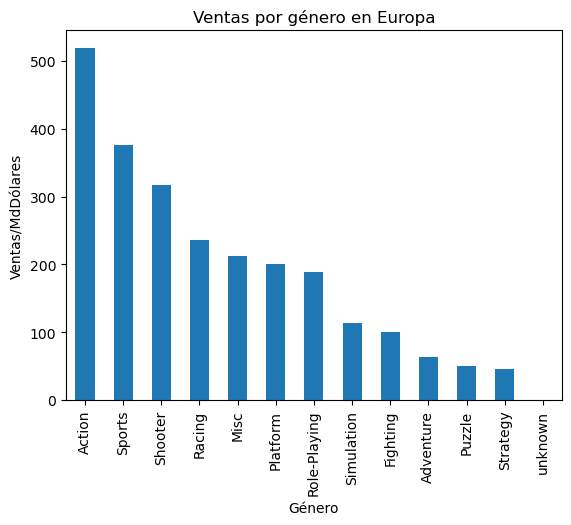

In [44]:
# Top géneros en cada región:
df_games_jpgen_sales=df_games.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales',ascending=False)
df_games_nagen_sales=df_games.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales',ascending=False)
df_games_eugen_sales=df_games.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales',ascending=False)
df_games_jpgen_sales.plot(x='genre',y='jp_sales',title='Ventas por género en Japón', xlabel='Género',ylabel='Ventas/MdDólares',legend=False,kind='bar')
df_games_nagen_sales.plot(x='genre',y='na_sales',title='Ventas por género en Norteámerica', xlabel='Género',ylabel='Ventas/MdDólares',legend=False,kind='bar')
df_games_eugen_sales.plot(x='genre',y='eu_sales',title='Ventas por género en Europa', xlabel='Género',ylabel='Ventas/MdDólares',legend=False,kind='bar')



Vemos que los géneros de acción, deportes y misceláneos son apreciados en todas las regiones. En Japón, la principal diferencia son los juegos de role-play en primer lugar a diferencia de NA y EU que no son tan cotizados. Además, en NA y EU los juegos de shooter aparecen en los primeros lugares, contrario a Japón dónde no se toman tanto en cuenta. Finalmente, los juegos de la plataforma son valorados en Japón y en NA, miéntras que en EU ese lugar lo ocupan los juegos de racing. 

<Axes: title={'center': 'Ventas por rating en Europa'}, xlabel='Rating', ylabel='Ventas/MdDólares'>

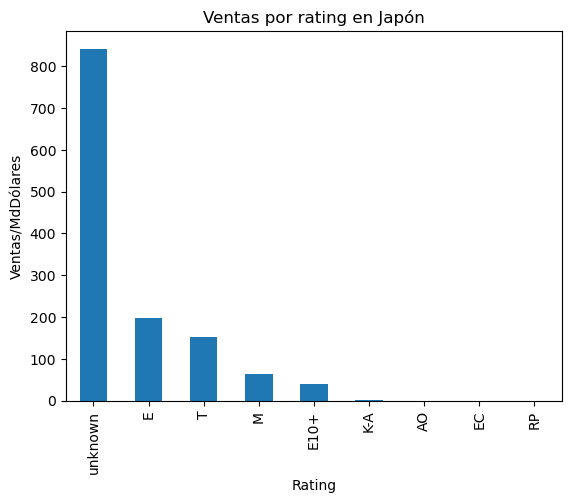

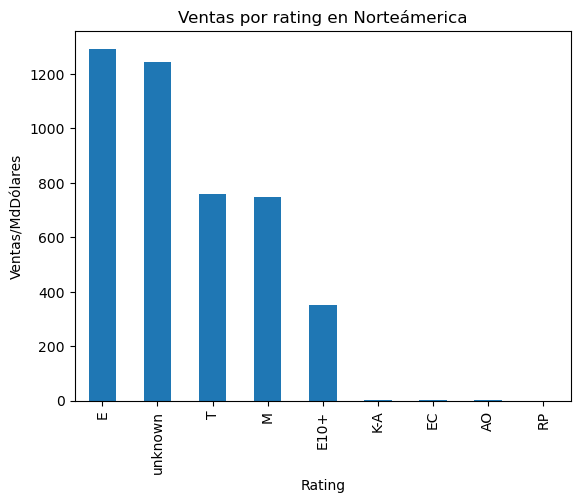

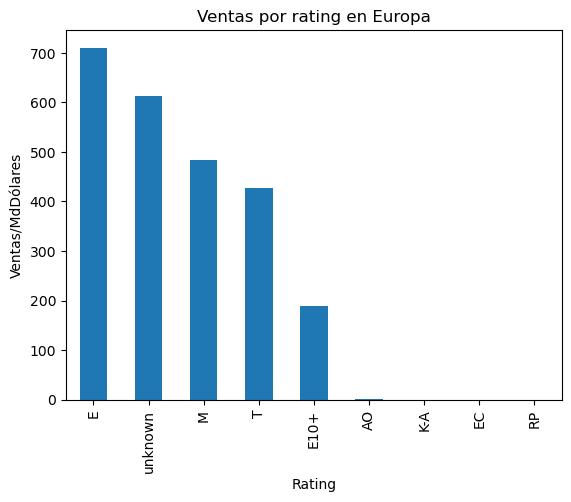

In [45]:
df_games_jprat_sales=df_games.groupby('rating')['jp_sales'].sum().reset_index().sort_values('jp_sales',ascending=False)
df_games_narat_sales=df_games.groupby('rating')['na_sales'].sum().reset_index().sort_values('na_sales',ascending=False)
df_games_eurat_sales=df_games.groupby('rating')['eu_sales'].sum().reset_index().sort_values('eu_sales',ascending=False)
df_games_jprat_sales.plot(x='rating',y='jp_sales',title='Ventas por rating en Japón', xlabel='Rating',ylabel='Ventas/MdDólares',legend=False,kind='bar')
df_games_narat_sales.plot(x='rating',y='na_sales',title='Ventas por rating en Norteámerica', xlabel='Rating',ylabel='Ventas/MdDólares',legend=False,kind='bar')
df_games_eurat_sales.plot(x='rating',y='eu_sales',title='Ventas por rating en Europa', xlabel='Rating',ylabel='Ventas/MdDólares',legend=False,kind='bar')


Los gráficos nos indican que tanto en NA y EU las mayores ventas se ven reflejadas en juegos con clasificación E, Everyone. La segunda categoría es para Unknown, que eran datos nulos en el dataset original. Finalmente para Japón y Na, la tercera categoría más importante es T, miéntras que en EU es M. 

## Paso 5: Pruebas de hipótesis

Usaremos una hipotesis de dos colas para probar las siguientes hipotesis nulas:

H01: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H02: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Halt1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

Halt2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Se utilizará un alpha=.05


In [46]:
# Definir si las calificaciones promedio de usuarios son iguales en XBOX ONE Y PC
# Prueba las hipótesis
sample_1=df_games[(df_games['platform']=='XOne') & (~df_games['user_score'].isna())]['user_score']
sample_2=df_games[(df_games['platform']=='PC') & (~df_games['user_score'].isna())]['user_score']
# Se considera a alpha con 5% y las varianzas son iguales.
alpha=.05
result=st.ttest_ind(sample_1,sample_2,equal_var=True)
if result.pvalue < alpha:
    print('Se rechaza la hipótesis nula, pvalue:',result.pvalue)
else:
    print('Se acepta la hipótesis nula, pvalue:', result.pvalue)


Se rechaza la hipótesis nula, pvalue: 1.3896435533548819e-05


Concluimos que las calificaciones promedio de los usuarios NO es la misma para PC y XOne. 

In [47]:
# Definir si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# Prueba las hipótesis
sample_1=df_games[(df_games['genre']=='Action') & (~df_games['user_score'].isna())]['user_score']
sample_2=df_games[(df_games['genre']=='Sports') & (~df_games['user_score'].isna())]['user_score']

print(sample_1.var())
print(sample_2.var())

# Se considera a alpha con 5% y las varianzas son iguales.
alpha=.05
result=st.ttest_ind(sample_1,sample_2,equal_var=True)
if result.pvalue < alpha:
    print('Se rechaza la hipótesis nula, pvalue:',result.pvalue)
else:
    print('Se acepta la hipótesis nula, pvalue:', result.pvalue)


2.031746898033191
2.5965147189730073
Se acepta la hipótesis nula, pvalue: 0.10406951359049141


Con esta prueba definimos que las puntuaciones promedio de usuario son iguales en los géneros de deportes y acción

## Paso 6: Conclusión general

Durante la preparación de los datos de los videojuegos, encontramos algunos problemas al preparar los datos:
- Los nombres en las columnas no seguian en todos los casos el formato snake_case
- year_of_release estaba en float, al contar con valores nulos de tipo NaN.
- user_score se encontraba con tipo object, ya que contaba con algunos datos 'tbd'
- Se encontraron bastantes valores nulos en critic_score, user_score y rating.

Se tomaron las siguientes decisiones al respecto:
- Se uso un bucle for para cambiar los nombres de las columnas al formato snake_case usando lower().
- Se utilizó el promedio de año (int) de lanzamiento para cada plataforma para cambiar los valores nulos de year_of_release y se cambio el tipo de dato a int
- 'tbd' se convirtio a np.NaN, para cambiar el tipo de dato a float
- Se generó la columna de total_sales con el total de ventas de todas las regiones. 
- Los valores nulos de rating se llenaron con 'unknown'
- Finalmente se dejaron como nulos los valores en critic_score y user_score, ya que no sería sensato utilizar un promedio o la media.

Durante el análisis de los datos nos encontramos con las siguientes conclusiones:
- A partir del año 1994 crece el número de juegos lanzados por año de manera significativa.
- Se tomaron en cuenta las ventas de 2005 a 2015 para revisar el crecimiento y decrecimiento de las plataformas en auge a ese momento, al faltar información de 2016.
- Las plataformas con mayor cantidad de ventas históricas han sido: PS2, PS3, X360, Wii Y DS.
- En promedio las plataformas duran 10 años entre su despegue y caida.
- Las plataformas que a día de hoy son las más potencialmente rentables son PS4 y XOne.
- La mayoría de los juegos no tienen más de 3MdD de ventas en promedio globalmente.
- La correlación entre las ventas y el score de la crítica es releevante hasta en un 40%. Más importante que el del usuario.
- Los géneros más rentables en NA y EU son acción, deportes y shooter. Mientrás que en Japón el shooter no es valorado y en su lugar sobresalen los juegos de role-play.
- En japón son muy valoradas las plataformas de PS y PS2 y las consolas portatiles de nintendo, DS y 3DS.
- En Europa y NA, las consolas de PS3 y X360 tuvieron mucho éxito a diferencia de Japón.
- Globalmente la clasificación que más se consume es E. Sin embargo hay un alto número de venta en juegos que no conocemos la clasificación.

En cuanto a pruebas de hipotesis:
Comprobamos que las calificaciones promedio de usuario en las plataformas de XOne y PC no son iguales.
Mientrás las calificaciones promedio de usuario para los juegos de acción y deportes si los son.


